In [1]:
import argparse
import os
import gym
import numpy as np
import pickle
from tqdm import trange
import visdom
import math

import torch
from torch.distributions import uniform

from ddpg import DDPG
from normalized_actions import NormalizedActions
from action_noise import NormalActionNoise
from utils import save_model, vis_plot, load_model
import ast

import itertools
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import copy
import random

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
# functions

def load_dict(filename_to_load):
    with open(filename_to_load, 'rb') as f:
        results_dic = pickle.load(f)
    return results_dic

def eval_model(_env, alpha):
    total_reward = 0
    with torch.no_grad():
        state = agent.Tensor([_env.reset()])
        while True:
            action = agent.select_action(state, mdp_type='mdp')
            if random.random() < alpha:
                action = noise.sample(action.shape).view(action.shape)

            state, reward, done, _ = _env.step(action.cpu().numpy()[0])
            total_reward += reward

            state = agent.Tensor([state])
            if done:
                break
    return total_reward

In [6]:
#test = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env/my_test_archived/Hopper-v4/SGLD_thermal_0.001__action_noise_0.2/0/results")
#test = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env/my_test_archived/Humanoid-v4/SGLD_thermal_0.0001/action_noise_0.01/0/results")

#test = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env_min/my_test_archived/Walker2d-v4-fixed_c-SGLMLD/SGLMLD_actor_fixed_c-0/0/results")
#test = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env_min/my_test_archived/Walker2d-v4-fixed_c-SGLMLD/SGLMLD_actor_c100000/0/results")

#test1 = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env_max/my_test_archived/HalfCheetah-v4-fixed_c-SGLMLD/SGLMLD_actor_c100000/0/results")
#test1 = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env_max/my_test_archived/Hopper-v4-c_magnitude-SGLMLD/SGLMLD_actor_adversary_c100/1/results")
test1 = load_dict("C:/Users/ASUS/Desktop/aaa_UINVERSITY/Y4S1/DSA4199/github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics/mujoco_env_max/my_test_archived/Hopper-v4-c_magnitude-SGLMLD/SGLMLD_adversary_ct10/0/results")



In [7]:
for each in test1.keys():
    print("======")
    print(each)
    size = len(test1[each])
    for i in range(0, size, size//100):
        print(i, ":", test1[each][i])

eval_rewards
0 : (100, 23.096849344667298)
17 : (1100, 249.4438325766244)
34 : (3400, 33.77883640757273)
51 : (4100, 14.38953449642156)
68 : (5200, 27.864947893916355)
85 : (6800, 257.9462701170835)
102 : (8300, 136.5775016454474)
119 : (9600, 193.09433825019897)
136 : (11000, 206.58439550723645)
153 : (12600, 203.7986351905153)
170 : (20200, 864.1116038618262)
187 : (28900, 242.99967992035812)
204 : (30100, 111.47378781442285)
221 : (31300, 155.2230404103239)
238 : (32600, 162.8406392884852)
255 : (34000, 188.9115785591618)
272 : (35600, 205.69201222781743)
289 : (37100, 264.04397313886244)
306 : (39200, 300.9890914320304)
323 : (41400, 289.64178470833366)
340 : (43800, 395.54549891293703)
357 : (45200, 168.0985619904851)
374 : (47200, 430.38327424074896)
391 : (49200, 221.49163232933572)
408 : (51300, 345.370709702502)
425 : (53800, 456.08135577122124)
442 : (56400, 469.696092730558)
459 : (59200, 290.9505540808294)
476 : (61500, 220.2878601565125)
493 : (63900, 305.58915343812316)
5

In [35]:
for each in test2.keys():
    print("======")
    print(each)
    size = len(test2[each])
    for i in range(0, size, size//100):
        print(i, ":", test2[each][i])

eval_rewards
0 : (1000, -372.6909627369048)
2 : (3000, -508.84738731544144)
4 : (5000, -198.59989115397593)
6 : (7000, -351.11644100624125)
8 : (9000, -111.74488930735366)
10 : (11000, -492.25687880422083)
12 : (13000, 76.11280310978604)
14 : (15000, -56.36928255235492)
16 : (17000, 53.79404845221517)
18 : (19000, -46.46111447956784)
20 : (21000, -71.34278017589165)
22 : (23000, 132.94070281146466)
24 : (25000, 100.29191536387535)
26 : (27000, -424.8785271029081)
28 : (29000, -408.1462221802182)
30 : (31000, 118.1172605894859)
32 : (33000, 218.77131195530333)
34 : (35000, -281.4011984230843)
36 : (37000, 16.19362710426343)
38 : (39000, -766.3472821753353)
40 : (41000, -491.19170961244157)
42 : (43000, -433.92574280926004)
44 : (45000, -790.8919676785803)
46 : (47000, -516.3299424886387)
48 : (49000, -875.9214870530975)
50 : (51000, -234.6084274068641)
52 : (53000, -695.1040280862564)
54 : (55000, 538.853487198248)
56 : (57000, -568.6000121562141)
58 : (59000, -212.00974186214108)
60 : 

# Testing SGLMLD

In [7]:
np.arctan(2)

1.1071487177940904

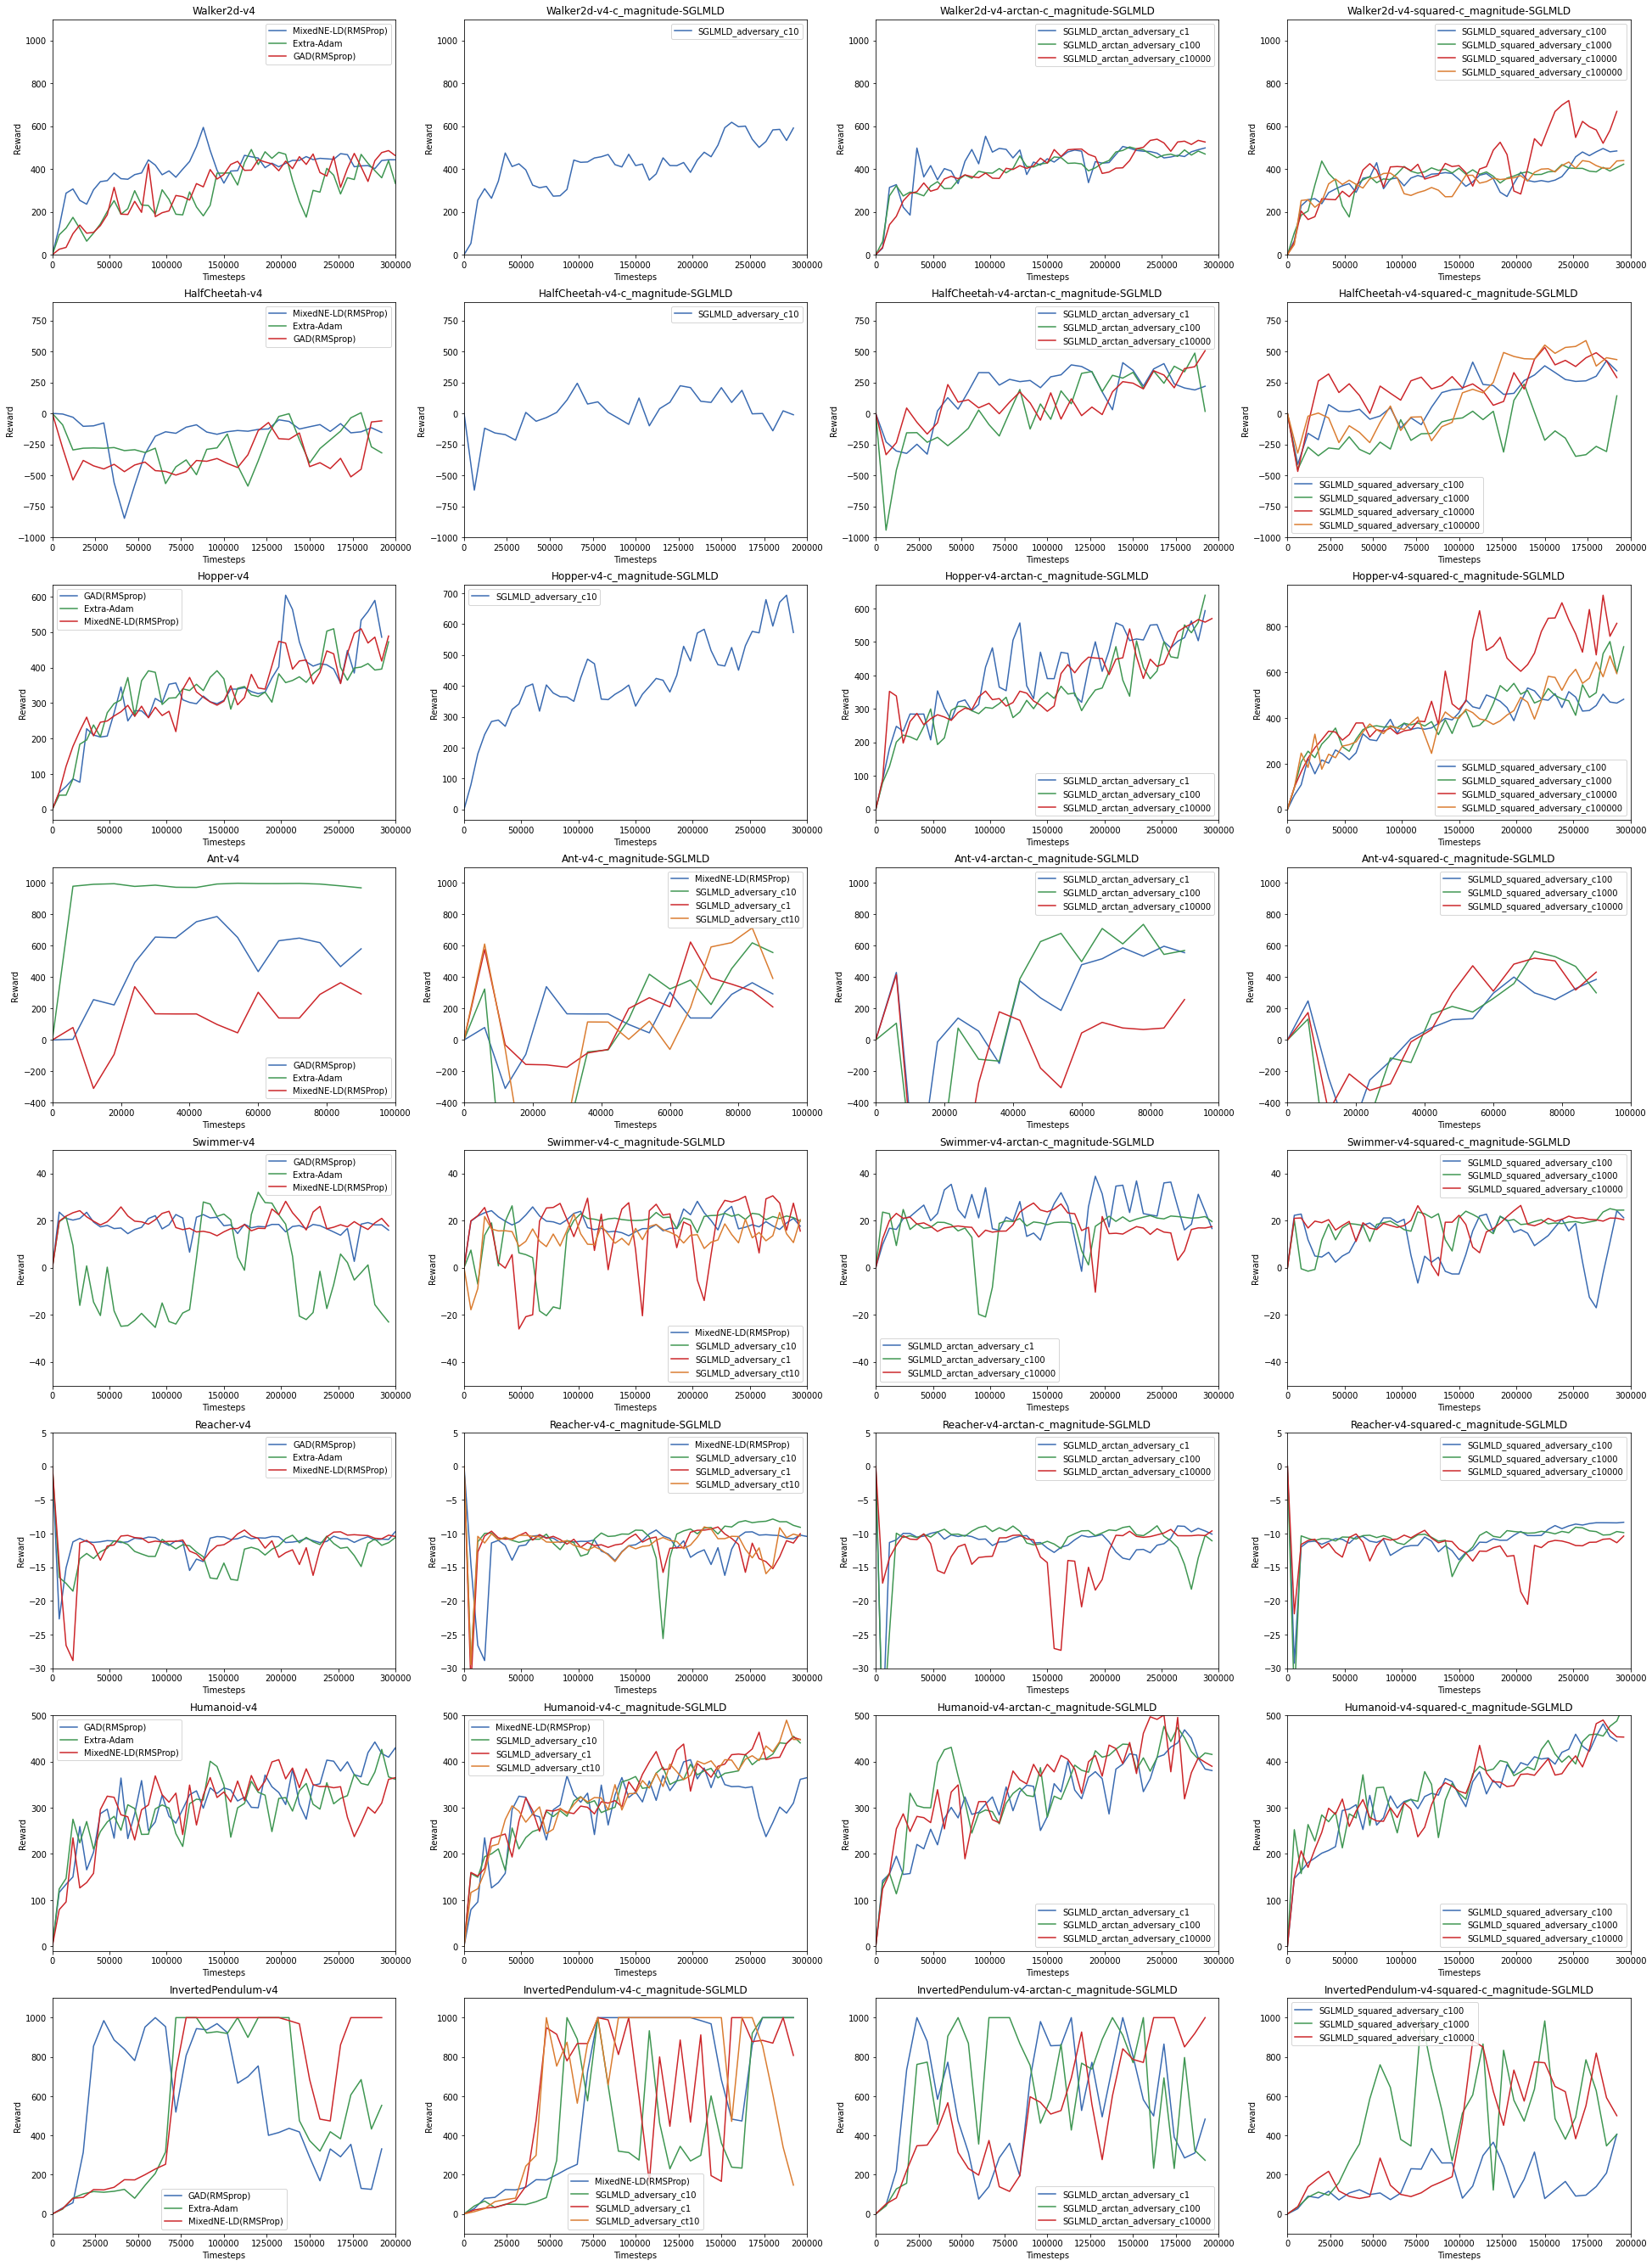

In [3]:
# Testing what happens if I just calculate c_difference based on the train_rewards to modify the noise used to update actor and adversary

environments = ["Walker2d-v4", "Walker2d-v4-c_magnitude-SGLMLD", "Walker2d-v4-arctan-c_magnitude-SGLMLD",  "Walker2d-v4-squared-c_magnitude-SGLMLD",
                "HalfCheetah-v4",  "HalfCheetah-v4-c_magnitude-SGLMLD", "HalfCheetah-v4-arctan-c_magnitude-SGLMLD",  "HalfCheetah-v4-squared-c_magnitude-SGLMLD",
                "Hopper-v4", "Hopper-v4-c_magnitude-SGLMLD", "Hopper-v4-arctan-c_magnitude-SGLMLD", "Hopper-v4-squared-c_magnitude-SGLMLD",
                 "Ant-v4", "Ant-v4-c_magnitude-SGLMLD", "Ant-v4-arctan-c_magnitude-SGLMLD", "Ant-v4-squared-c_magnitude-SGLMLD",
                 "Swimmer-v4", "Swimmer-v4-c_magnitude-SGLMLD","Swimmer-v4-arctan-c_magnitude-SGLMLD", "Swimmer-v4-squared-c_magnitude-SGLMLD",
                 "Reacher-v4", "Reacher-v4-c_magnitude-SGLMLD","Reacher-v4-arctan-c_magnitude-SGLMLD", "Reacher-v4-squared-c_magnitude-SGLMLD",
                 "Humanoid-v4", "Humanoid-v4-c_magnitude-SGLMLD","Humanoid-v4-arctan-c_magnitude-SGLMLD", "Humanoid-v4-squared-c_magnitude-SGLMLD",
                 "InvertedPendulum-v4", "InvertedPendulum-v4-c_magnitude-SGLMLD","InvertedPendulum-v4-arctan-c_magnitude-SGLMLD", "InvertedPendulum-v4-squared-c_magnitude-SGLMLD"]
tests = {}
tests["blank"] = []

#tests["HalfCheetah-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.01_no_noise', 'SGLMLD_actor_c100000', 'SGLMLD_actor_c10000']
tests["HalfCheetah-v4"] = ['SGLD__thermal_0.01_no_noise', 'ExtraAdam__action_noise_0.01', 'RMSprop__action_noise_0.2']
#tests["HalfCheetah-v4-c_magnitude-SGLMLD"] = ['SGLD__thermal_0.01_no_noise', 'SGLMLD_adversary_c100000', 'SGLMLD_adversary_c10000', 'SGLMLD_adversary_c100', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10', 'SGLMLD_adversary_ct10000']
tests["HalfCheetah-v4-c_magnitude-SGLMLD"] = ['SGLMLD_adversary_c10']
tests["HalfCheetah-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["HalfCheetah-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000", "SGLMLD_squared_adversary_c100000"]

tests["Walker2d-v4"] = ['SGLD__thermal_0.01_action_noise_0.01', 'ExtraAdam__action_noise_0.3', 'RMSprop__no_noise']
#tests["Walker2d-v4-c_magnitude-SGLMLD"] = ['SGLD__thermal_0.01_action_noise_0.01', 'SGLMLD_adversary_c100000', 'SGLMLD_adversary_c10000','SGLMLD_adversary_c100', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10', 'SGLMLD_adversary_ct10000']
tests["Walker2d-v4-c_magnitude-SGLMLD"] = ['SGLMLD_adversary_c10']
tests["Walker2d-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Walker2d-v4-fixed_c-SGLMLD"] = ['SGLMLD_actor_fixed_c-0', 'SGLMLD_actor_fixed_c-50', 'SGLMLD_actor_fixed_c-100', 'SGLMLD_actor_fixed_c-150', 'SGLMLD_actor_fixed_c-200']
tests["Walker2d-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000", "SGLMLD_squared_adversary_c100000"]

tests["Hopper-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2']
#tests["Hopper-v4-c_magnitude-SGLMLD"] = ['SGLD_thermal_0.001__action_noise_0.2', 'SGLMLD_adversary_c100000', 'SGLMLD_adversary_c10000','SGLMLD_adversary_c100', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10', 'SGLMLD_adversary_ct10000']
tests["Hopper-v4-c_magnitude-SGLMLD"] = ['SGLMLD_adversary_c10']
tests["Hopper-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Hopper-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000", "SGLMLD_squared_adversary_c100000"]

tests["Reacher-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.2', 'SGLD_thermal_0.001/action_noise_0.2']
tests["Reacher-v4-c_magnitude-SGLMLD"] = ['SGLD_thermal_0.001/action_noise_0.2', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10']
tests["Reacher-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Reacher-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000"]

tests["InvertedPendulum-v4"] = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01']
tests["InvertedPendulum-v4-c_magnitude-SGLMLD"] = ['SGLD__thermal_0.001_action_noise_0.01', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10']
tests["InvertedPendulum-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["InvertedPendulum-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000"]

tests["Humanoid-v4"] = ['RMSprop/no_noise', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01']
tests["Humanoid-v4-c_magnitude-SGLMLD"] = ['SGLD_thermal_0.0001/action_noise_0.01', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10']
tests["Humanoid-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Humanoid-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000"]

tests["Swimmer-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.4', 'SGLD_thermal_1e-05/action_noise_0.4']
tests["Swimmer-v4-c_magnitude-SGLMLD"] = ['SGLD_thermal_1e-05/action_noise_0.4', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10']
tests["Swimmer-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Swimmer-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000"]

tests["Ant-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.2']
tests["Ant-v4-c_magnitude-SGLMLD"] = ['SGLD_thermal_0.0001/action_noise_0.2', 'SGLMLD_adversary_c10', 'SGLMLD_adversary_c1', 'SGLMLD_adversary_ct10']
tests["Ant-v4-arctan-c_magnitude-SGLMLD"] = ["SGLMLD_arctan_adversary_c1", "SGLMLD_arctan_adversary_c100", "SGLMLD_arctan_adversary_c10000"]
tests["Ant-v4-squared-c_magnitude-SGLMLD"] = ["SGLMLD_squared_adversary_c100", "SGLMLD_squared_adversary_c1000", "SGLMLD_squared_adversary_c10000"]



rows = 8
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(25*cols/3, 12*rows/2))
env_num = -1
for env_name in environments:
    env_num += 1
    results_loc = os.getcwd() + '/my_test_archived/' + env_name
    results = {}
    for test in tests[env_name]:
        results[test] = {}
        seed_num = len(os.listdir(results_loc+"/"+test))
        for seed in range(seed_num):
            with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
                results[test][seed] = pickle.load(f)

    colors = ['#396ab1', '#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    window_size = 6000
    ax = axs.flatten()[env_num]
    idx = 0
    final_avg = []
    final_std = []
    for exp in results:
        reward = []    
        for seed in results[exp]:
            reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
        merged = list(itertools.chain.from_iterable(reward))
        out = np.array(merged) 
        out = out.reshape(-1,2)
        df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
        length = int(df.Column1.values[-1]/window_size)
        x = np.zeros(length)
        y_avg = np.zeros(length)
        y_std = np.zeros(length)
        for i in range(1, length):
            data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
            x[i] = window_size * i
            y_avg[i] = np.mean(data)
            y_std[i] = np.std(data)
        avg = y_avg[-10:]
        final_avg.append(np.mean(avg))
        final_std.append(np.std(avg))
        if 'RMSprop' in exp:
            l = 'GAD(RMSprop)'
        elif 'ExtraAdam' in exp:
            l = 'Extra-Adam'
        elif 'SGLMLD' in exp:
            l = exp
        else:
            l = 'MixedNE-LD(RMSProp)'       
        ax.plot(x, y_avg, color = colors[idx], label = l)
        ax.set_title(env_name)    
        ax.set_xlabel('Timesteps')
        ax.set_ylabel('Reward')
        ax.legend()
        ax.set_xlim([0, 300000])
        if "Walker" in env_name:
            ax.set_ylim([0,1100])
        if "HalfCheetah" in env_name:
            ax.set_ylim([-1000, 900])
            ax.set_xlim([0, 200000])
        if "Hopper" in env_name:
            #ax.set_ylim([-100, 2000])
            ax.set_xlim([0, 300000])
        if "Ant" in env_name:
            ax.set_ylim([-400, 1100])
            ax.set_xlim([0, 100000])
        if "Swimmer" in env_name:
            ax.set_ylim([-50, 50])
        if "Reacher" in env_name:
            ax.set_ylim([-30, 5])
        if "Humanoid" in env_name:
            ax.set_ylim([-10, 500])
        if "InvertedPendulum" in env_name:
            ax.set_ylim([-100, 1100])
            ax.set_xlim([0, 200000])
        #ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)

    
        idx += 1  



In [5]:
# Make results dictionary 
environments = ["HalfCheetah-v4", "Hopper-v4", "Ant-v4", "Swimmer-v4", "Reacher-v4", "Humanoid-v4", "InvertedPendulum-v4"]
tests = {}
tests["HalfCheetah-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.01_no_noise', "SGLMLD"]
#tests["Walker2d-v4"] = ['RMSprop__no_noise','ExtraAdam__action_noise_0.3', 'SGLD__thermal_0.01_action_noise_0.01']
tests["Reacher-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.2', 'SGLD_thermal_0.001/action_noise_0.2', "SGLMLD"]
tests["Hopper-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2', "SGLMLD"]
tests["InvertedPendulum-v4"] = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01', "SGLMLD"]
tests["Humanoid-v4"] = ['RMSprop/no_noise', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01', "SGLMLD"]
tests["Swimmer-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.4', 'SGLD_thermal_1e-05/action_noise_0.4', "SGLMLD"]
tests["Ant-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.2', "SGLMLD"]
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
seed_num = 1

for env_name in environments:
    base_dir = os.getcwd() + '/my_test_archived/' + env_name + "/"
    env = NormalizedActions(gym.make(env_name))

    agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
            hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
            action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
            two_player=True, normalize_obs=True)
    noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

    basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

    test_episodes = 10
    results = {}

    for test in tests[env_name]:
        test_dir = base_dir + test + '/'#+ str(seed) + '/'
        print(" - ")
        print("test_dir: ",test_dir)    
        results[test] = {}
        for seed in range(seed_num):
            results[test][seed] = {}
            print("seed num:", seed)
            load_model(agent=agent, basedir=test_dir+str(seed))
            agent.eval()
            for mass in mass_nums:
                results[test][seed][mass] = []
                for _ in range(test_episodes):
                    for idx in range(len(basic_bm)):
                        env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                    r = eval_model(env, 0)
                    results[test][seed][mass].append(r)

    with open(base_dir+'mass_results', 'wb') as f:
        pickle.dump(results, f)

 - 
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/HalfCheetah-v4/RMSprop__action_noise_0.2/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/HalfCheetah-v4/RMSprop__action_noise_0.2/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/HalfCheetah-v4/RMSprop__action_noise_0.2/0/ddpg_adversary


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


NameError: name 'eval_model' is not defined

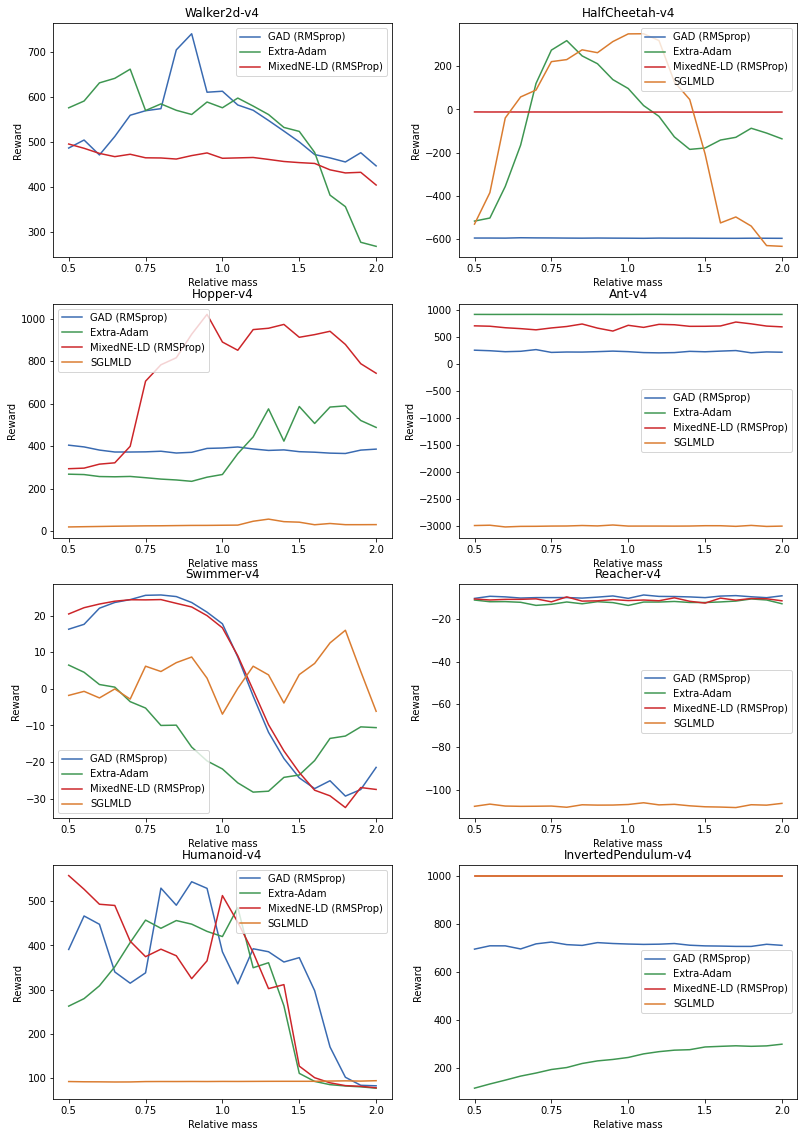

In [15]:
environments = ["Walker2d-v4", "HalfCheetah-v4", "Hopper-v4", "Ant-v4", "Swimmer-v4", "Reacher-v4", "Humanoid-v4", "InvertedPendulum-v4"]
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']
rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
env_num = -1
for env_name in environments:
    env_num += 1
    results_loc = os.getcwd() + '/my_test_archived/' + env_name + "/mass_results"
    results = load_dict(results_loc)


    x = [i for i in range(len(mass_nums))]
    ax = axs.flatten()[env_num]
    idx = 0
    for test in results:
        avg = []
        std = []
        for seed in results[test]:
            avg_seed = []
            std_seed = []
            for mass in results[test][seed]:
                avg_seed.append(np.mean(results[test][seed][mass]))
                std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
            avg.append(avg_seed)
            std.append(std_seed)
        avg = np.array(avg)
        std = np.array(std)
        avg = np.mean(avg, axis=0)
        std = np.mean(std, axis=0)

        if 'RMSprop' in test:
                l = 'GAD (RMSprop)'
        elif 'ExtraAdam' in test:
            l = 'Extra-Adam'
        elif 'SGLMLD' in test:
            l = 'SGLMLD'
        else:
            l = 'MixedNE-LD (RMSProp)'    
        ax.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
        ax.set_title(env_name)         
        ax.set_xticks([0, 5, 10, 15, 20])
        ax.set_xticklabels([0.5, 0.75, 1.0, 1.5, 2.0])
        ax.set_xlabel('Relative mass')
        ax.set_ylabel('Reward')
        ax.legend()
        #plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
        idx += 1
plt.subplots_adjust(bottom=0.05)#, top=5)




# All Graphs

In [1]:
environments = ["Walker2d-v4", "HalfCheetah-v4", "Hopper-v4", "Ant-v4", "Swimmer-v4", "Reacher-v4", "Humanoid-v4", "InvertedPendulum-v4"]
tests = {}
tests["HalfCheetah-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.01_no_noise']
tests["Walker2d-v4"] = ['RMSprop__no_noise','ExtraAdam__action_noise_0.3', 'SGLD__thermal_0.01_action_noise_0.01']
tests["Reacher-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.2', 'SGLD_thermal_0.001/action_noise_0.2']
tests["Hopper-v4"] = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2']
tests["InvertedPendulum-v4"] = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01']
tests["Humanoid-v4"] = ['RMSprop/no_noise', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01']
tests["Swimmer-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.4', 'SGLD_thermal_1e-05/action_noise_0.4']
tests["Ant-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.2']

rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
env_num = -1
for env_name in environments:
    env_num += 1
    results_loc = os.getcwd() + '/my_test_archived/' + env_name
    results = {}
    for test in tests[env_name]:
        results[test] = {}
        seed_num = len(os.listdir(results_loc+"/"+test))
        for seed in range(seed_num):
            with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
                results[test][seed] = pickle.load(f)

    colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    window_size = 3000
    ax = axs.flatten()[env_num]
    idx = 0
    final_avg = []
    final_std = []
    for exp in results:
        reward = []    
        for seed in results[exp]:
            reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
        merged = list(itertools.chain.from_iterable(reward))
        out = np.array(merged) 
        out = out.reshape(-1,2)
        df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
        length = int(df.Column1.values[-1]/window_size)
        x = np.zeros(length)
        y_avg = np.zeros(length)
        y_std = np.zeros(length)
        for i in range(1, length):
            data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
            x[i] = window_size * i
            y_avg[i] = np.mean(data)
            y_std[i] = np.std(data)
        avg = y_avg[-10:]
        final_avg.append(np.mean(avg))
        final_std.append(np.std(avg))
        if 'RMSprop' in exp:
            l = 'GAD(RMSprop)'
        elif 'ExtraAdam' in exp:
            l = 'Extra-Adam'
        else:
            l = 'MixedNE-LD(RMSProp)'       
        ax.plot(x, y_avg, color = colors[idx], label = l)
        ax.set_title(env_name)    
        ax.set_xlabel('Timesteps')
        ax.set_ylabel('Reward')

        #plt.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
        idx += 1  



NameError: name 'plt' is not defined

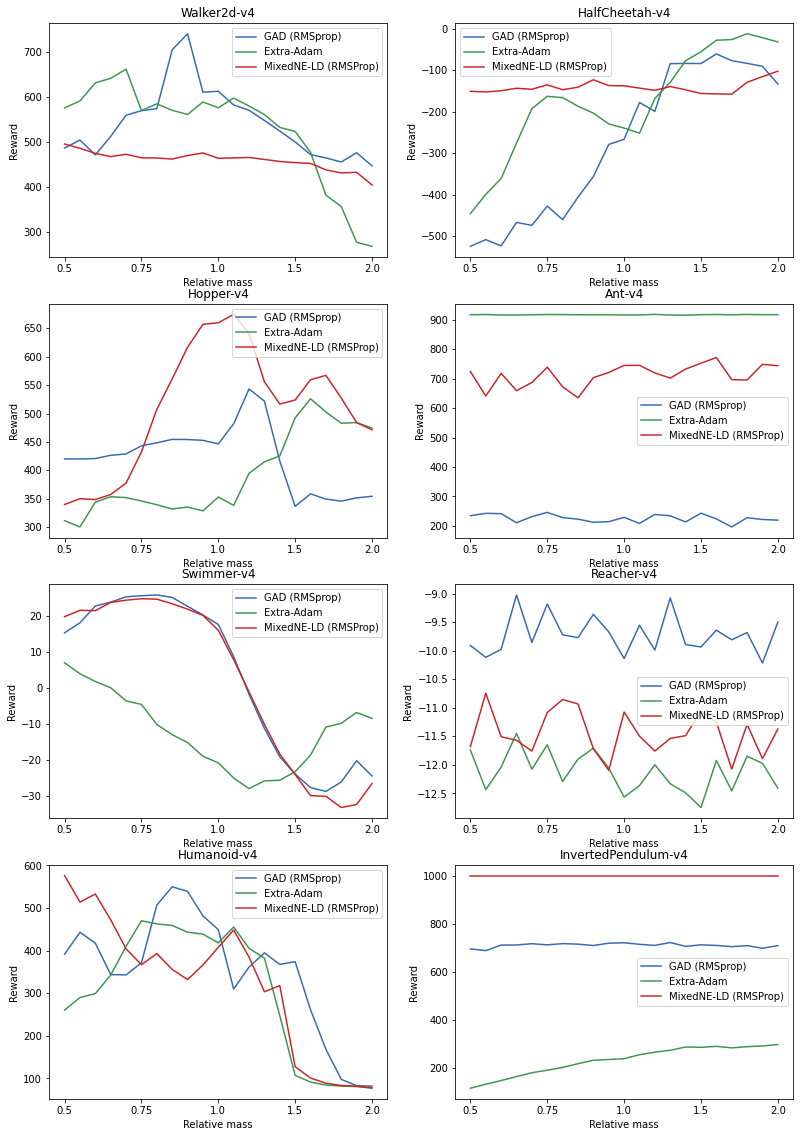

In [19]:
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']
rows = 4
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
env_num = -1
for env_name in environments:
    env_num += 1
    #results_loc = os.getcwd() + '/my_test_archived/' + env_name + "/mass_results"
    results_loc = os.getcwd() + '/my_test_archived_results_dic_no_lm/' + env_name + "/mass_results"
    results = load_dict(results_loc)


    x = [i for i in range(len(mass_nums))]
    ax = axs.flatten()[env_num]
    idx = 0
    for test in results:
        avg = []
        std = []
        for seed in results[test]:
            avg_seed = []
            std_seed = []
            for mass in results[test][seed]:
                avg_seed.append(np.mean(results[test][seed][mass]))
                std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
            avg.append(avg_seed)
            std.append(std_seed)
        avg = np.array(avg)
        std = np.array(std)
        avg = np.mean(avg, axis=0)
        std = np.mean(std, axis=0)

        if 'RMSprop' in test:
                l = 'GAD (RMSprop)'
        elif 'ExtraAdam' in test:
            l = 'Extra-Adam'
        else:
            l = 'MixedNE-LD (RMSProp)'    
        ax.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
        ax.set_title(env_name)         
        ax.set_xticks([0, 5, 10, 15, 20])
        ax.set_xticklabels([0.5, 0.75, 1.0, 1.5, 2.0])
        ax.set_xlabel('Relative mass')
        ax.set_ylabel('Reward')
        ax.legend()
        #plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
        idx += 1
plt.subplots_adjust(bottom=0.05)#, top=5)




# Walker

In [3]:
#target = "mujoco_env/models/Walker2d-v4/RMSprop/no_noise/nr_mdp_0.1_1/0/results"
results = {}
optimizers = ["RMSprop", "ExtraAdam", "SGLD"]
base_dir = os.getcwd() + '/my_test/'

def load_dict(filename_to_load):
    with open(filename_to_load, 'rb') as f:
        results_dic = pickle.load(f)
    return results_dic

results = {}
for optimizer in optimizers:
    results[optimizer] = {}
    for seed in range(2):
        file_location = base_dir + optimizer +'/'+ str(seed) + '/results'
        results[optimizer][seed] = load_dict(file_location)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ASUS\\Desktop\\aaa_UINVERSITY\\Y4S1\\DSA4199\\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\\mujoco_env/my_test/RMSprop/0/results'

exp: RMSprop
exp: ExtraAdam
exp: SGLD


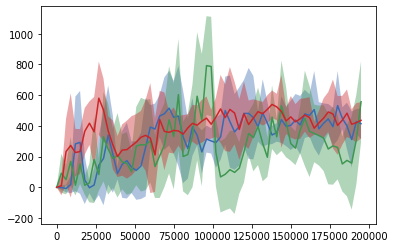

In [4]:
window_size = 3000
var = True
colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', 
            '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
idx = 0
final_avg = []
final_std = []
for exp in results:
    print("exp:", exp)
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    if (var):
        plt.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

# Relative Mass

In [7]:
#target = "mujoco_env/models/Walker2d-v4/RMSprop/no_noise/nr_mdp_0.1_1/0/results_model"
results = {}
optimizers = ["RMSprop", "ExtraAdam", "SGLD"]
base_dir = os.getcwd() + '/my_test/'

def load_dict(filename_to_load):
    with open(filename_to_load, 'rb') as f:
        results_dic = pickle.load(f)
    return results_dic

results = {}
for optimizer in optimizers:
    results[optimizer] = {}
    for seed in range(2):
        file_location = base_dir + optimizer +'/'+ str(seed) + '/results'
        results[optimizer][seed] = load_dict(file_location)

2


# When seed is 0

In [7]:
base_dir = os.getcwd() + '/my_test/'
optimizers = ["RMSprop", "ExtraAdam", "SGLD"]
#model_locations = ["ExtraAdam/0/"]

env = NormalizedActions(gym.make("Walker2d-v4"))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
            hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
            action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
            two_player=True, normalize_obs=True)

results = {}
test_episodes = 10
basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())
for optimizer in optimizers:
    load_model(agent=agent, basedir=base_dir+optimizer+"/0/")
    agent.eval()
    results[optimizer] = {}
    for mass in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]: #np.linspace(0.8, 1.2, 20):
        if mass not in results:
            results[optimizer][mass] = []
        for _ in range(test_episodes):
            for idx in range(len(basic_bm)):
                env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
            r = eval_model(env, 0)
            results[optimizer][mass].append(r)


Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/RMSprop/0//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/RMSprop/0//ddpg_adversary
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/ExtraAdam/0//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/ExtraAdam/0//ddpg_adversary
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/SGLD/0//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\g

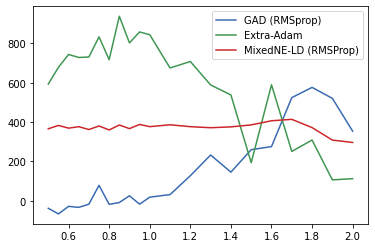

In [9]:
x = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']

idx = 0
for optimizers in results:
    avg = []
    for mass in results[optimizers]:
        avg.append(np.mean(results[optimizers][mass]))
    
        
    if 'RMSprop' in optimizers:
        l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in optimizers:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'                
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-")
    idx += 1
plt.legend()
#plt.set_title(env_name)         
#ax.set_xticks([0, 5, 10, 15, 20])
#ax.set_xticklabels([0.5, 0.75, 1.0, 1.5, 2.0])
#ax.set_xlabel('Relative mass')
#ax.set_ylabel('Reward')

# When seed is 1

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/RMSprop/1//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/RMSprop/1//ddpg_adversary
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/ExtraAdam/1//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/ExtraAdam/1//ddpg_adversary
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/SGLD/1//ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\g

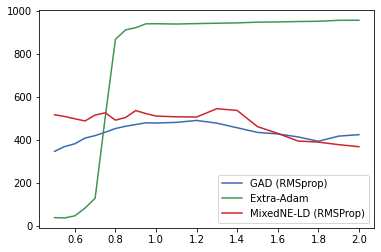

In [24]:
base_dir = os.getcwd() + '/my_test/'
optimizers = ["RMSprop", "ExtraAdam", "SGLD"]
#model_locations = ["ExtraAdam/0/"]

env = NormalizedActions(gym.make("Walker2d-v4"))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
            hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
            action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
            two_player=True, normalize_obs=True)

results = {}
test_episodes = 100
basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())
for optimizer in optimizers:
    load_model(agent=agent, basedir=base_dir+optimizer+"/1/")
    agent.eval()
    results[optimizer] = {}
    for mass in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]: #np.linspace(0.8, 1.2, 20):
        if mass not in results:
            results[optimizer][mass] = []
        for _ in range(test_episodes):
            for idx in range(len(basic_bm)):
                env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
            r = eval_model(env, 0)
            results[optimizer][mass].append(r)

x = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']

idx = 0
for optimizers in results:
    avg = []
    for mass in results[optimizers]:
        avg.append(np.mean(results[optimizers][mass]))
    
        
    if 'RMSprop' in optimizers:
        l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in optimizers:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'                
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-")
    idx += 1
plt.legend()
#ax.set_title(env_name)         
#ax.set_xticks([0, 5, 10, 15, 20])
#ax.set_xticklabels([0.5, 0.75, 1.0, 1.5, 2.0])
#ax.set_xlabel('Relative mass')
#ax.set_ylabel('Reward')

Text(0, 0.5, 'Reward')

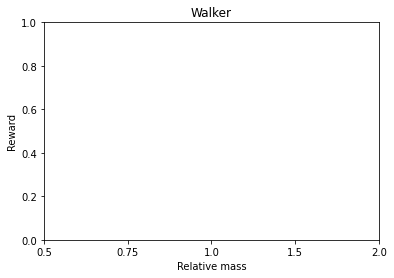

In [18]:
plt.title("Walker")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')

# Average of seeds test


In [66]:
# Make results dictionary

env_name = "Walker2d-v4"
base_dir = os.getcwd() + '/my_test/' + env_name + "/"
tests = ['RMSprop__no_noise','ExtraAdam__action_noise_0.3', 'SGLD__thermal_0.01_action_noise_0.01']
for test in tests:
    print(test)
seed_num = 2
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 10
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("=== test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

with open(base_dir+'mass_results', 'wb') as f:
    pickle.dump(results, f)

RMSprop__no_noise
ExtraAdam__action_noise_0.3
SGLD__thermal_0.01_action_noise_0.01
=== test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/0/ddpg_adversary


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


seed num: 1
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/1/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/1/ddpg_adversary
=== test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/ExtraAdam__action_noise_0.3/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/ExtraAdam__action_noise_0.3/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Lang

Text(0, 0.5, 'Reward')

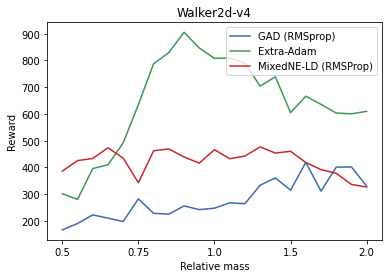

In [67]:
results_loc = os.getcwd() + "/my_test/" + "Walker2d-v4/" + "mass_results"
results = load_dict(results_loc)

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    idx += 1
    
plt.legend()
plt.title("Walker2d-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



# Test on 500k  (my_test_old1)


In [107]:
# Make results dictionary

env_name = "Walker2d-v4"
base_dir = os.getcwd() + '/my_test_old1/' + env_name + "/"
tests = ['RMSprop__no_noise','ExtraAdam__action_noise_0.3', 'SGLD__thermal_0.01_action_noise_0.01']
for test in tests:
    print(test)
seed_num = 3
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 100
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("=== test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            print("Current Mass:", mass)
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

#with open(base_dir+'mass_results', 'wb') as f:
#    pickle.dump(results, f)

RMSprop__no_noise
ExtraAdam__action_noise_0.3
SGLD__thermal_0.01_action_noise_0.01
=== test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old1/Walker2d-v4/RMSprop__no_noise/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old1/Walker2d-v4/RMSprop__no_noise/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old1/Walker2d-v4/RMSprop__no_noise/0/ddpg_adversary
Current Mass: 0.5
Current Mass: 0.55


KeyboardInterrupt: 

Text(0, 0.5, 'Reward')

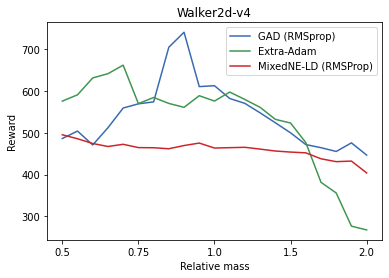

In [104]:
results_loc = os.getcwd() + "/my_test/" + "Walker2d-v4/" + "mass_results"
results = load_dict(results_loc)
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    #plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
    idx += 1
    
plt.legend()
plt.title("Walker2d-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



Text(0, 0.5, 'Reward')

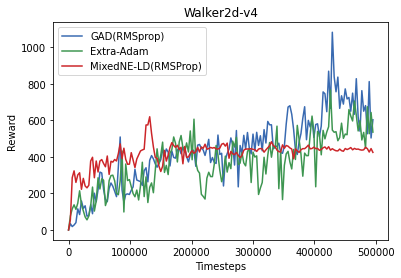

In [22]:
env_name = "Walker2d-v4"
results_loc = os.getcwd() + '/my_test_archived/' + env_name + "/"
tests = ['RMSprop__no_noise','ExtraAdam__action_noise_0.3', 'SGLD__thermal_0.01_action_noise_0.01']
results = {}
for test in tests:
    results[test] = {}
    for seed in range(3):
        with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
            results[test][seed] = pickle.load(f)

colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
window_size = 3000

idx = 0
final_avg = []
final_std = []
for exp in results:
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    #if (var):
    #plt.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

plt.legend()
plt.title("Walker2d-v4")         
plt.xlabel('Timesteps')
plt.ylabel('Reward')


# Test on 200k Cheetah (my_test_old2)

Previous section doesn't look great.  
My hope is that MixedNE-LD performing worse is due to some kind of changes between Walker2d-v2 and v4.  
Looking at the learning curve in plot.ipynb, the difference in performance is most clear in HalfCheetah even with only 200k steps.  
Optimistically that should work better.

In [25]:
# Make results dictionary

env_name = "HalfCheetah-v4"
base_dir = os.getcwd() + '/my_test/' + env_name + "/"
tests = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.01_no_noise']
for test in tests:
    print(test)
seed_num = 3
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 30
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("   =   =  =  =   ")
    print("test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

with open(base_dir+'mass_results', 'wb') as f:
    pickle.dump(results, f)

RMSprop__no_noise
ExtraAdam__action_noise_0.3
SGLD__thermal_0.01_action_noise_0.01
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/0/ddpg_adversary


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ASUS\\Desktop\\aaa_UINVERSITY\\Y4S1\\DSA4199\\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\\mujoco_env/my_test/Walker2d-v4/RMSprop__no_noise/0/ddpg_actor'

Text(0, 0.5, 'Reward')

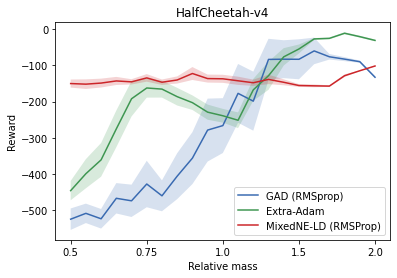

In [30]:
env_name = "HalfCheetah-v4"
results_loc = os.getcwd() + "/my_test_old2/" + env_name + "/mass_results"
results = load_dict(results_loc)
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
    idx += 1
    
plt.legend()
plt.title("HalfCheetah-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



Text(0, 0.5, 'Reward')

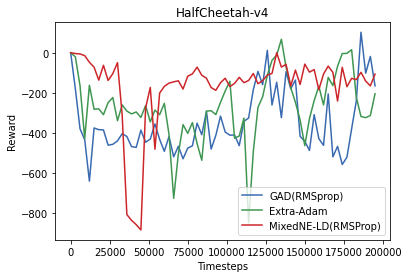

In [23]:
env_name = "HalfCheetah-v4"
#base_dir = os.getcwd() + '/my_test/' + env_name + "/"
base_dir = os.getcwd() + '/my_test_old2/' + env_name + "/"
tests = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.01_no_noise']
results_loc = os.getcwd() + '/my_test_old2/' + env_name
results = {}
for test in tests:
    results[test] = {}
    for seed in range(3):
        with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
            results[test][seed] = pickle.load(f)

colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
window_size = 3000

idx = 0
final_avg = []
final_std = []
for exp in results:
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    #if (var):
    #   ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

plt.legend()
plt.title("HalfCheetah-v4")         
plt.xlabel('Timesteps')
plt.ylabel('Reward')


# Test on 350k Reacher
The HalfCheetah looks better.  
Trying on Reacher-v2 now.

In [16]:
# Make results dictionary

env_name = "Reacher-v4"
#base_dir = os.getcwd() + '/my_test/' + env_name + "/"
base_dir = os.getcwd() + '/my_test_old2_reacher/' + env_name + "/"
tests = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.2', 'SGLD_thermal_0.001/action_noise_0.2']
for test in tests:
    print(test)
seed_num = 3
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 30
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("   =   =  =  =   ")
    print("test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

with open(base_dir+'mass_results', 'wb') as f:
    pickle.dump(results, f)

RMSprop__action_noise_0.2
ExtraAdam__action_noise_0.01
SGLD__thermal_0.01_no_noise
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old2/HalfCheetah-v4/RMSprop__action_noise_0.2/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old2/HalfCheetah-v4/RMSprop__action_noise_0.2/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old2/HalfCheetah-v4/RMSprop__action_noise_0.2/0/ddpg_adversary


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


KeyboardInterrupt: 

RMSprop/action_noise_0.4
ExtraAdam/action_noise_0.2
SGLD_thermal_0.001/action_noise_0.2


Text(0, 0.5, 'Reward')

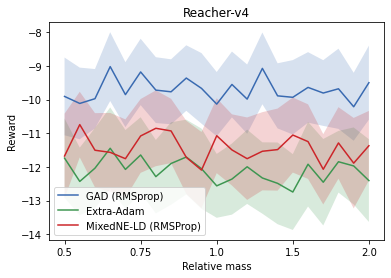

In [9]:
env_name = "Reacher-v4"
results_loc = os.getcwd() + '/my_test_old3_reacher/' + env_name + "/mass_results"
#results_loc = os.getcwd() + "/my_test/" + env_name + "/mass_results"
results = load_dict(results_loc)
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

for test in results:
    print(test)
idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
    idx += 1
    
plt.legend()
plt.title("Reacher-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



Text(0, 0.5, 'Reward')

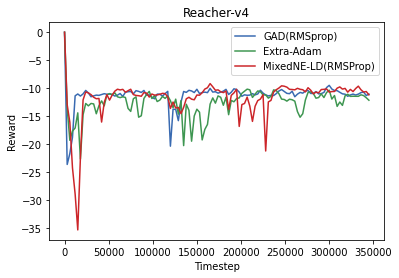

In [22]:
env_name = "Reacher-v4"
tests = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.2', 'SGLD_thermal_0.001/action_noise_0.2']
results_loc = os.getcwd() + '/my_test_old3_reacher/' + env_name
results = {}
for test in tests:
    results[test] = {}
    for seed in range(3):
        with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
            results[test][seed] = pickle.load(f)

colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
window_size = 3000

idx = 0
final_avg = []
final_std = []
for exp in results:
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    #if (var):
    #   ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

plt.legend()
plt.title("Reacher-v4")         
#plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Timestep')
plt.ylabel('Reward')


# Hopper 300k

Text(0, 0.5, 'Reward')

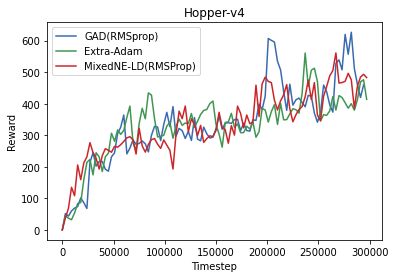

In [32]:
env_name = "Hopper-v4"
tests = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2']
results_loc = os.getcwd() + '/my_test_old4_hopper/' + env_name
results = {}
for test in tests:
    results[test] = {}
    for seed in range(3):
        with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
            results[test][seed] = pickle.load(f)

colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
window_size = 3000

idx = 0
final_avg = []
final_std = []
for exp in results:
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    #if (var):
    #   ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

plt.legend()
plt.title("Hopper-v4")         
#plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Timestep')
plt.ylabel('Reward')


In [33]:
# Make results dictionary

env_name = "Hopper-v4"
#base_dir = os.getcwd() + '/my_test/' + env_name + "/"
base_dir = os.getcwd() + '/my_test_old4_hopper/' + env_name + "/"
tests = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2']
for test in tests:
    print(test)
seed_num = 3
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 30
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("   =   =  =  =   ")
    print("test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

with open(base_dir+'mass_results', 'wb') as f:
    pickle.dump(results, f)

RMSprop__action_noise_0.2
ExtraAdam__action_noise_0.3
SGLD_thermal_0.001__action_noise_0.2
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/0/ddpg_adversary


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


seed num: 1
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/1/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/1/ddpg_adversary
seed num: 2
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/2/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old4_hopper/Hopper-v4/RMSprop__action_noise_0.2/2/ddpg_adversary
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4

RMSprop__action_noise_0.2
ExtraAdam__action_noise_0.3
SGLD_thermal_0.001__action_noise_0.2


Text(0, 0.5, 'Reward')

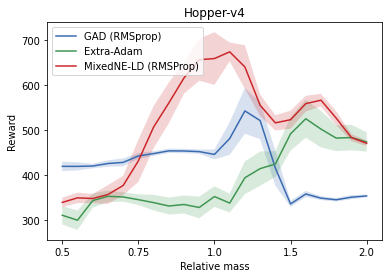

In [34]:
env_name = "Hopper-v4"
#base_dir = os.getcwd() + '/my_test/' + env_name + "/"
results_loc = os.getcwd() + '/my_test_old4_hopper/' + env_name + "/mass_results"
tests = ['RMSprop__action_noise_0.2', 'ExtraAdam__action_noise_0.3', 'SGLD_thermal_0.001__action_noise_0.2']
#results_loc = os.getcwd() + "/my_test/" + env_name + "/mass_results"
results = load_dict(results_loc)
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

for test in results:
    print(test)
idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
    idx += 1
    
plt.legend()
plt.title("Hopper-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



# Inverted Pendulum 200k

Text(0, 0.5, 'Reward')

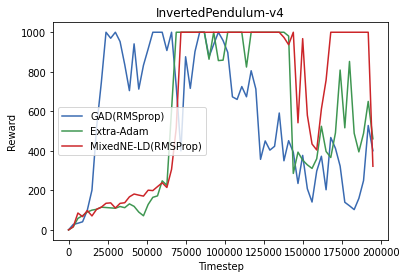

In [4]:
env_name = "InvertedPendulum-v4"
tests = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01']
results_loc = os.getcwd() + '/my_test_old5_inverted/' + env_name
results = {}
for test in tests:
    results[test] = {}
    for seed in range(1):
        with open(results_loc + "/" + test + "/" + str(seed) + '/results', 'rb') as f:
            results[test][seed] = pickle.load(f)

colors = ['#396ab1', '#3e9651', '#cc2529', '#396ab1', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
window_size = 3000

idx = 0
final_avg = []
final_std = []
for exp in results:
    reward = []    
    for seed in results[exp]:
        reward.append(list(itertools.chain(*(results[exp][seed]['eval_rewards']))))
    merged = list(itertools.chain.from_iterable(reward))
    out = np.array(merged) 
    out = out.reshape(-1,2)
    df = pd.DataFrame({'Column1':out[:,0],'Column2':out[:,1]})
    length = int(df.Column1.values[-1]/window_size)
    x = np.zeros(length)
    y_avg = np.zeros(length)
    y_std = np.zeros(length)
    for i in range(1, length):
        data = (df[(df.Column1 <= window_size * i) & (df.Column1 > window_size * (i-1))]).Column2.values
        x[i] = window_size * i
        y_avg[i] = np.mean(data)
        y_std[i] = np.std(data)
    avg = y_avg[-10:]
    final_avg.append(np.mean(avg))
    final_std.append(np.std(avg))
    if 'RMSprop' in exp:
        l = 'GAD(RMSprop)'
    elif 'ExtraAdam' in exp:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD(RMSProp)'       
    plt.plot(x, y_avg, color = colors[idx], label = l)
    #if (var):
    #   ax.fill_between(x, (y_avg)-(y_std), (y_avg)+(y_std), facecolor=colors[idx], alpha=0.4, interpolate=True)
    idx += 1  

plt.legend()
plt.title("InvertedPendulum-v4")         
#plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Timestep')
plt.ylabel('Reward')


In [5]:
# Make results dictionary
env_name = "InvertedPendulum-v4"
tests = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01']
base_dir = os.getcwd() + '/my_test_old5_inverted/' + env_name + "/"

for test in tests:
    print(test)
seed_num = 1
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

env = NormalizedActions(gym.make(env_name))

agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
        hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
        action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
        two_player=True, normalize_obs=True)
noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

test_episodes = 10
results = {}

for test in tests:
    test_dir = base_dir + test + '/'#+ str(seed) + '/'
    print("   =   =  =  =   ")
    print("test_dir: ",test_dir)    
    results[test] = {}
    for seed in range(seed_num):
        results[test][seed] = {}
        print("seed num:", seed)
        load_model(agent=agent, basedir=test_dir+str(seed))
        agent.eval()
        for mass in mass_nums:
            results[test][seed][mass] = []
            for _ in range(test_episodes):
                for idx in range(len(basic_bm)):
                    env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                r = eval_model(env, 0)
                results[test][seed][mass].append(r)

with open(base_dir+'mass_results', 'wb') as f:
    pickle.dump(results, f)

RMSprop__action_noise_0.1
ExtraAdam__action_noise_0.01
SGLD__thermal_0.001_action_noise_0.01
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/RMSprop__action_noise_0.1/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/RMSprop__action_noise_0.1/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/RMSprop__action_noise_0.1/0/ddpg_adversary


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13216\2320563625.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\win

   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/ExtraAdam__action_noise_0.01/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/ExtraAdam__action_noise_0.01/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/ExtraAdam__action_noise_0.01/0/ddpg_adversary
   =   =  =  =   
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_old5_inverted/InvertedPendulum-v4/SGLD__thermal_0.001_action_noise_0.01/
s

RMSprop__action_noise_0.1
ExtraAdam__action_noise_0.01
SGLD__thermal_0.001_action_noise_0.01


Text(0, 0.5, 'Reward')

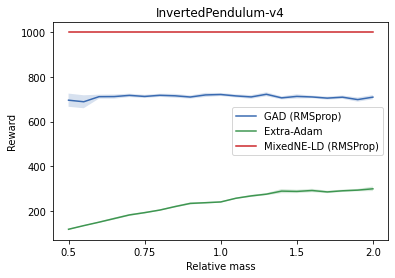

In [7]:
env_name = "InvertedPendulum-v4"
tests = ['RMSprop__action_noise_0.1', 'ExtraAdam__action_noise_0.01', 'SGLD__thermal_0.001_action_noise_0.01']
results_loc = os.getcwd() + '/my_test_old5_inverted/' + env_name + "/mass_results"

#results_loc = os.getcwd() + "/my_test/" + env_name + "/mass_results"
results = load_dict(results_loc)
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

x = [i for i in range(len(mass_nums))]
colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d']

for test in results:
    print(test)
idx = 0
for test in results:
    avg = []
    std = []
    for seed in results[test]:
        avg_seed = []
        std_seed = []
        for mass in results[test][seed]:
            avg_seed.append(np.mean(results[test][seed][mass]))
            std_seed.append(np.std(results[test][seed][mass]) / np.sqrt(len(results[test][seed][mass]) - 1) * 2)
        avg.append(avg_seed)
        std.append(std_seed)
    avg = np.array(avg)
    std = np.array(std)
    avg = np.mean(avg, axis=0)
    std = np.mean(std, axis=0)

    if 'RMSprop' in test:
            l = 'GAD (RMSprop)'
    elif 'ExtraAdam' in test:
        l = 'Extra-Adam'
    else:
        l = 'MixedNE-LD (RMSProp)'    
    plt.plot(x, avg, label=l, color=colors[idx], linestyle="-") 
    plt.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
    idx += 1
    
plt.legend()
plt.title("InvertedPendulum-v4")         
plt.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
plt.xlabel('Relative mass')
plt.ylabel('Reward')



In [55]:
# Make results dictionary for Humanoid, Swimmer and Ant
environments = ["Humanoid-v4", "Swimmer-v4", "Ant-v4"]
environments = ["Ant-v4"]
tests = {}
tests["Humanoid-v4"] = ['RMSprop/no_noise', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01']
tests["Swimmer-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.4', 'SGLD_thermal_1e-05/action_noise_0.4']
tests["Ant-v4"] = ['RMSprop/action_noise_0.4', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.2']
mass_nums = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
seed_num = 1

for env_name in environments:
    base_dir = os.getcwd() + '/my_test_archived/' + env_name + "/"
    env = NormalizedActions(gym.make(env_name))

    agent = DDPG(beta=0.9, epsilon=0, learning_rate=1e-4, gamma=0.99, tau=0.01, 
            hidden_size_dim0=64, hidden_size_dim1=64, num_inputs=env.observation_space.shape[0], 
            action_space=env.action_space, train_mode=False, alpha=0, replay_size=0, optimizer = 0, 
            two_player=True, normalize_obs=True)
    noise = uniform.Uniform(agent.Tensor([-1.0]), agent.Tensor([1.0]))

    basic_bm = copy.deepcopy(env.env.env.model.body_mass.copy())

    test_episodes = 10
    results = {}

    for test in tests[env_name]:
        test_dir = base_dir + test + '/'#+ str(seed) + '/'
        print(" - ")
        print("test_dir: ",test_dir)    
        results[test] = {}
        for seed in range(seed_num):
            results[test][seed] = {}
            print("seed num:", seed)
            load_model(agent=agent, basedir=test_dir+str(seed))
            agent.eval()
            for mass in mass_nums:
                results[test][seed][mass] = []
                for _ in range(test_episodes):
                    for idx in range(len(basic_bm)):
                        env.env.env.model.body_mass[idx] = basic_bm[idx] * mass
                    r = eval_model(env, 0)
                    results[test][seed][mass].append(r)

    with open(base_dir+'mass_results', 'wb') as f:
        pickle.dump(results, f)

 - 
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/Ant-v4/RMSprop/action_noise_0.4/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/Ant-v4/RMSprop/action_noise_0.4/0/ddpg_actor c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/Ant-v4/RMSprop/action_noise_0.4/0/ddpg_adversary
 - 
test_dir:  c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-Adversarial-training-with-Langevin-Dynamics\mujoco_env/my_test_archived/Ant-v4/ExtraAdam/action_noise_0.01/
seed num: 0
Loading models from c:\Users\ASUS\Desktop\aaa_UINVERSITY\Y4S1\DSA4199\github Robust-Reinforcement-Learning-via-